In [1]:
library(dataiku)
library(ggplot2)

ERROR: Error in library(dataiku): there is no package called ‘dataiku’


In [0]:
# Example: load a DSS dataset as a R dataframe
df <- dkuReadDataset("SalaryData", samplingMethod="head", nbRows=100000)
model = lm(df$Salary~df$YearsExperience)
head(df)

In [0]:
y_line = df$YearsExperience*coef(model)[2]+coef(model)[1]
ggplot(data=df, aes(x=YearsExperience, group=1)) +
    geom_point(aes(y=Salary), color = "Blue")+
    geom_line(aes(y=y_line), color = "red")+
    labs(title="Salary vs years of experience")+
    theme(plot.title = element_text(hjust = 0.5)) # Horizontal adjust can be adjusted by default with theme_update.
#plot(df[,"YearsExperience"], df[,2], col = 'blue',xlab = "Años experiencia", ylab="Salario")
#lines(df[,1], y_line, col = 'red')

## Multivariate regression
For this section we will use the "50 startups" to do a backward propagation model to check how a multi regression model can be fitted to data.

In [7]:
df <- dkuReadDataset("50_Startups", samplingMethod="head", nbRows=100000)
# First create the dummy variables.
df['new_york']= as.numeric(df['State']=='New York') 
# Only one is good to not fall victim of the Dummy variable trap
head(df)

No encoding supplied: defaulting to UTF-8.
`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over all variables, use `mutate_all()`


R.D.Spend Administration Marketing.Spend State      Profit   new_york
1 165349.2  136897.80      471784.1        New York   192261.8 1       
2 162597.7  151377.59      443898.5        California 191792.1 0       
3 153441.5  101145.55      407934.5        California 191050.4 0       
4 144372.4  118671.85      383199.6        New York   182902.0 1       
5 142107.3   91391.77      366168.4        California 166187.9 0       
6 131876.9   99814.71      362861.4        New York   156991.1 1

In [8]:
model1 = lm(df$Profit~df$R.D.Spend+df$Marketing.Spend+df$Administration+df$new_york) # Model on profit given Admon, R&D, Market, State = NY
summary(model1)


Call:
lm(formula = df$Profit ~ df$R.D.Spend + df$Marketing.Spend + 
    df$Administration + df$new_york)

Residuals:
   Min     1Q Median     3Q    Max 
-34163  -4312    113   6631  17916 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.042e+04  6.654e+03   7.577 1.43e-09 ***
df$R.D.Spend        8.080e-01  4.575e-02  17.662  < 2e-16 ***
df$Marketing.Spend  2.637e-02  1.668e-02   1.581    0.121    
df$Administration  -2.362e-02  5.186e-02  -0.455    0.651    
df$new_york        -1.332e+03  2.690e+03  -0.495    0.623    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9309 on 45 degrees of freedom
Multiple R-squared:  0.951,	Adjusted R-squared:  0.9467 
F-statistic: 218.4 on 4 and 45 DF,  p-value: < 2.2e-16


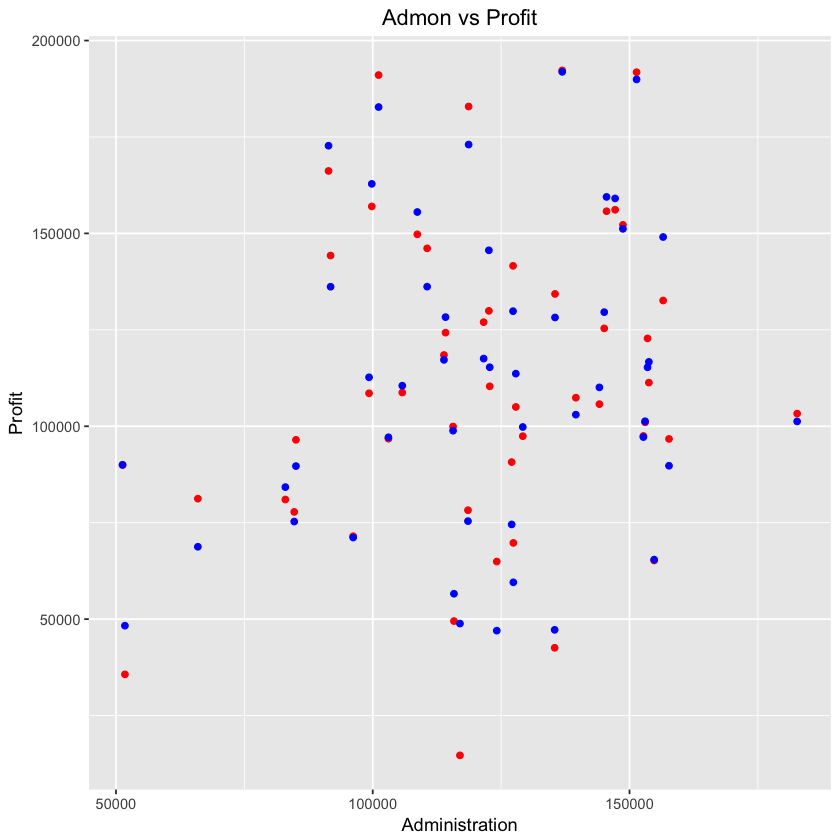

In [9]:
# Given the results, the intercept and the R&D should stay, but first we will check how the graph looks for the variable
# Administration that says should be eliminated first.
fitted_vals = fitted(model1)
ggplot(data = df, aes(x=Administration, y=Profit))+
    geom_point(color = "red")+
    geom_point(aes(y=fitted_vals), color="blue")+
    labs(title = 'Admon vs Profit', ylab= 'Profit', xlab = 'Administration Expenses')+
    theme(plot.title = element_text(hjust = 0.5))
#plot(df[,2], df[,5], ylab = 'Profit', xlab= 'Administration expenses', main = 'Admon vs profit', col = 'blue')
#points(df[,2], fitted_vals, col = 'red')

In [10]:
# Get rid of Admon spenses and continue with model.
model2 = lm(df$Profit~df$R.D.Spend+df$Marketing.Spend+df$new_york) # Model on profit given Admon, R&D, Market, State = NY
summary(model2)


Call:
lm(formula = df$Profit ~ df$R.D.Spend + df$Marketing.Spend + 
    df$new_york)

Residuals:
   Min     1Q Median     3Q    Max 
-34332  -4681    100   5792  17834 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.772e+04  3.018e+03  15.811   <2e-16 ***
df$R.D.Spend        8.003e-01  4.217e-02  18.976   <2e-16 ***
df$Marketing.Spend  2.859e-02  1.581e-02   1.809    0.077 .  
df$new_york        -1.485e+03  2.646e+03  -0.561    0.577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9228 on 46 degrees of freedom
Multiple R-squared:  0.9508,	Adjusted R-squared:  0.9476 
F-statistic: 296.2 on 3 and 46 DF,  p-value: < 2.2e-16


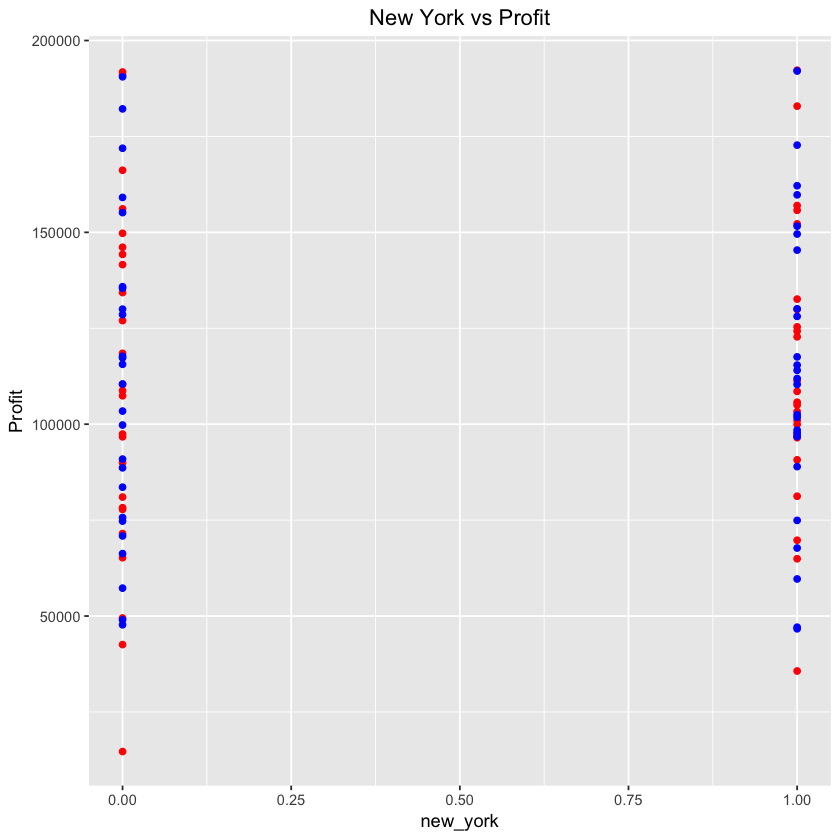

In [11]:
fitted_vals = fitted(model2)
# There should be a better plot for this kind of categorical vs numeric values comparison
ggplot(data = df, aes(y=Profit, x=new_york))+
    geom_point(color = "red")+
    geom_point(aes(y=fitted_vals), color="blue")+
    labs(title = 'New York vs Profit', ylab= 'Profit', xlab = 'New York')+
    theme(plot.title = element_text(hjust = 0.5)) 
#plot(df[,6], df[,5], ylab = 'Profit', xlab= 'Located on New York', main = 'New York vs profit', col = 'blue')
#points(df[,6], fitted_vals, col = 'red')

In [12]:
model3 = lm(df$Profit~df$R.D.Spend+df$Marketing.Spend) # Model on profit given Admon, R&D, Market, State = NY
summary(model3)


Call:
lm(formula = df$Profit ~ df$R.D.Spend + df$Marketing.Spend)

Residuals:
   Min     1Q Median     3Q    Max 
-33645  -4632   -414   6484  17097 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.698e+04  2.690e+03  17.464   <2e-16 ***
df$R.D.Spend       7.966e-01  4.135e-02  19.266   <2e-16 ***
df$Marketing.Spend 2.991e-02  1.552e-02   1.927     0.06 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9161 on 47 degrees of freedom
Multiple R-squared:  0.9505,	Adjusted R-squared:  0.9483 
F-statistic: 450.8 on 2 and 47 DF,  p-value: < 2.2e-16


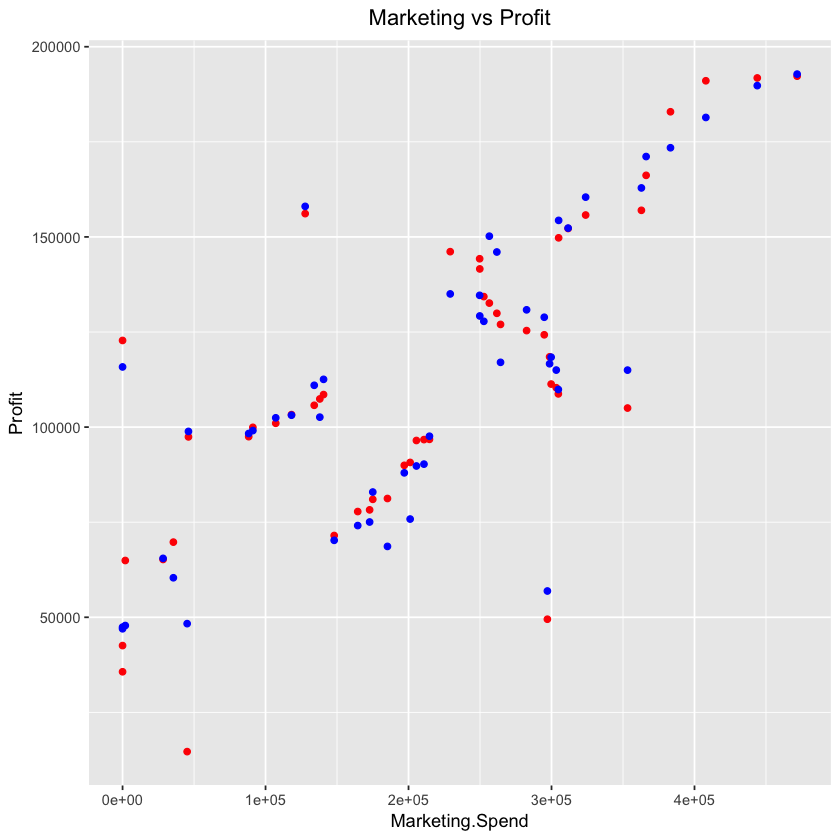

In [13]:
fitted_vals = fitted(model3)
ggplot(data = df, aes(y = Profit, x = Marketing.Spend))+
    geom_point(color = "red")+
    geom_point(aes(y = fitted_vals), color ="blue")+
    labs(title = 'Marketing vs Profit', ylab= 'Profit', xlab = 'Marketing Expenses')+
    theme(plot.title = element_text(hjust = 0.5))
#plot(df[,3], df[,5], ylab = 'Profit', xlab= 'Marketing expenses', main = 'Marketing vs profit', col = 'blue')
#points(df[,3], fitted_vals, col = 'red')
# let's remember that linear regression means that the variable to predict will form a linear function i.e.
# Profit is an linear increasing variable.

Suposedly Marketing expenses are not quite related to the profit and should be expelled from the model with a significance level of 0.05, but it seems when seen in the plot that there is a good correlation between Marketing expenses and profit, so we have to be carefull about this type of things.

## Logistic Regression
For this case we will create a Logistic regresion to check how to visualize it.

In [14]:
df <- dkuReadDataset("Email_Offer", samplingMethod="head", nbRows=100000)
df["Male"] <- as.numeric(df["Gender"] == "Male")
df["Female"] <- as.numeric(df["Gender"] == "Female")

No encoding supplied: defaulting to UTF-8.
`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over all variables, use `mutate_all()`


In [15]:
model <- glm(TookAction ~Age+Male,family=binomial(link='logit'),data=df)
summary(model)


Call:
glm(formula = TookAction ~ Age + Male, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.96524  -0.09857  -0.00566   0.09864   2.67479  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -38.1520     9.9869  -3.820 0.000133 ***
Age           0.8872     0.2318   3.828 0.000129 ***
Male          4.4374     1.4919   2.974 0.002937 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 134.602  on 99  degrees of freedom
Residual deviance:  29.613  on 97  degrees of freedom
AIC: 35.613

Number of Fisher Scoring iterations: 8


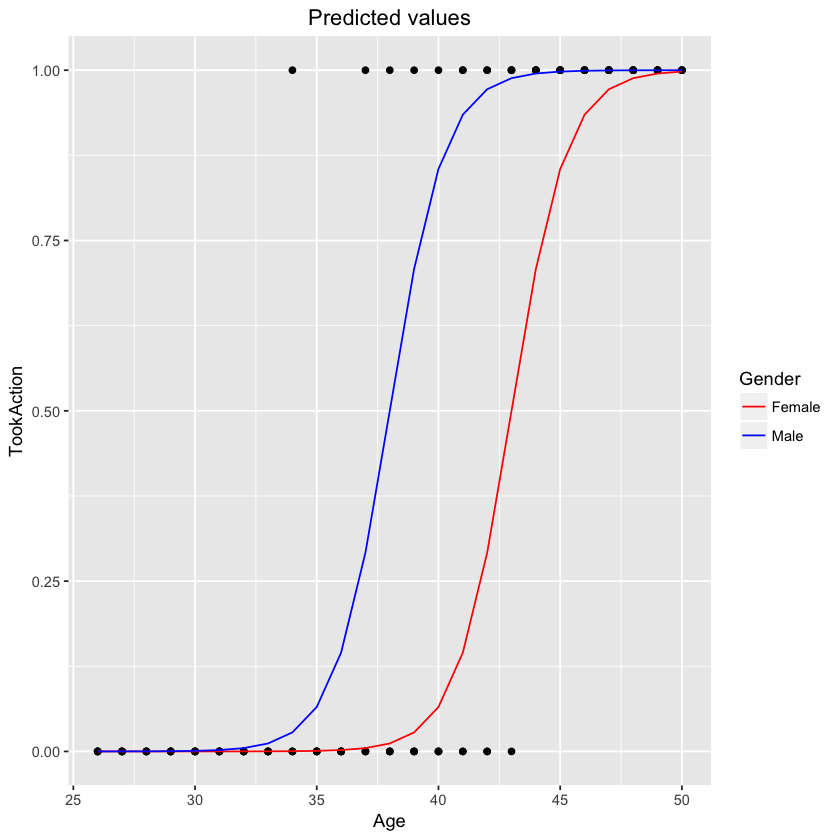

In [16]:
df["fit_val"] <- fitted(model)
df <- df[order(df$Age),]

ggplot(data = df, aes(y=TookAction, x=Age, group = Gender, color = Gender))+ 
    geom_point(color = "black")+
    geom_line(aes(y=fit_val))+
    labs(title = 'Predicted values', ylab= 'Took Action', xlab = 'Age')+
    scale_colour_manual(values = c("red", "blue"))+
    theme(plot.title = element_text(hjust = 0.5))
if(F){
# Only use to check difference normal graph and ggplot.
df_fem <- df[which(df["Male"] == 0),]
df_male <- df[which(df["Male"] == 1),]
plot(df$Age,df$TookAction)

lines(df_fem$Age,df_fem$fit_val, col ="blue", )
lines(df_male$Age,df_male$fit_val, col ="red")
legend(26, 1, legend=c("Male", "Female", "True values"),
       col=c("red", "blue","black"), lty=c(1,1,3), cex=0.8)
# Start using GGplot!
}

The reason why this graph has two logistic drawn are because if you suppose that the person buying is a male or female you get another curve, as seen in the model you get +4.4 for being a male and 0 if is a female.

## Geodemographic model
This section is focused to create a geodemographic model to understand when a client of a bank is more likely to leave based on the "Churn-Modeling" data given of their demographics and geolocation information.

In [17]:
df <- dkuReadDataset("Churn_Modelling", samplingMethod="head", nbRows=100000)
# First it is needed to create the dummy variables and then start generating the model
df["Female"] <- as.numeric(df["Gender"] == "Female")
df["Germany"] <- as.numeric(df["Geography"] == "Germany")
df["Spain"] <- as.numeric(df["Geography"] == "Spain")
head(df)

No encoding supplied: defaulting to UTF-8.
`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over all variables, use `mutate_all()`


RowNumber CustomerId Surname  CreditScore Geography Gender Age Tenure
1 1         15634602   Hargrave 619         France    Female 42  2     
2 2         15647311   Hill     608         Spain     Female 41  1     
3 3         15619304   Onio     502         France    Female 42  8     
4 4         15701354   Boni     699         France    Female 39  1     
5 5         15737888   Mitchell 850         Spain     Female 43  2     
6 6         15574012   Chu      645         Spain     Male   44  8     
  Balance   NumOfProducts HasCrCard IsActiveMember EstimatedSalary Exited
1      0.00 1             1         1              101348.88       1     
2  83807.86 1             0         1              112542.58       0     
3 159660.80 3             1         0              113931.57       1     
4      0.00 2             0         0               93826.63       0     
5 125510.82 1             1         1               79084.10       0     
6 113755.78 2             1         0              149756.71       1     
  Female Germany Spain
1 1      0       0    
2 1      0       1    
3 1      0       0    
4 1      0       0    
5 1      0       1    
6 0      0       1

In [18]:
# Start backward elimination process starting with the first model
model <- glm(Exited ~CreditScore+Age+Tenure+Balance+NumOfProducts+HasCrCard+IsActiveMember+EstimatedSalary+Female+Germany+Spain,family=binomial(link='logit'),data=df)
summary(model)


Call:
glm(formula = Exited ~ CreditScore + Age + Tenure + Balance + 
    NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary + 
    Female + Germany + Spain, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3097  -0.6589  -0.4560  -0.2697   2.9940  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.921e+00  2.454e-01 -15.980  < 2e-16 ***
CreditScore     -6.683e-04  2.803e-04  -2.384   0.0171 *  
Age              7.271e-02  2.576e-03  28.230  < 2e-16 ***
Tenure          -1.595e-02  9.355e-03  -1.705   0.0882 .  
Balance          2.637e-06  5.142e-07   5.128 2.92e-07 ***
NumOfProducts   -1.015e-01  4.713e-02  -2.154   0.0312 *  
HasCrCard       -4.468e-02  5.934e-02  -0.753   0.4515    
IsActiveMember  -1.075e+00  5.769e-02 -18.643  < 2e-16 ***
EstimatedSalary  4.807e-07  4.737e-07   1.015   0.3102    
Female           5.285e-01  5.449e-02   9.699  < 2e-16 ***
Ger

In [19]:
# Should get rid of Spain as a variable
model <- glm(Exited ~CreditScore+Age+Tenure+Balance+NumOfProducts+HasCrCard+IsActiveMember+EstimatedSalary+Female+Germany,family=binomial(link='logit'),data=df)
summary(model)


Call:
glm(formula = Exited ~ CreditScore + Age + Tenure + Balance + 
    NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary + 
    Female + Germany, family = binomial(link = "logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3099  -0.6584  -0.4559  -0.2691   2.9901  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.911e+00  2.445e-01 -15.994  < 2e-16 ***
CreditScore     -6.666e-04  2.803e-04  -2.378   0.0174 *  
Age              7.272e-02  2.575e-03  28.238  < 2e-16 ***
Tenure          -1.598e-02  9.354e-03  -1.708   0.0876 .  
Balance          2.637e-06  5.142e-07   5.129 2.91e-07 ***
NumOfProducts   -1.013e-01  4.713e-02  -2.149   0.0316 *  
HasCrCard       -4.493e-02  5.934e-02  -0.757   0.4489    
IsActiveMember  -1.075e+00  5.768e-02 -18.640  < 2e-16 ***
EstimatedSalary  4.813e-07  4.736e-07   1.016   0.3095    
Female           5.283e-01  5.449e-02   9.697  < 2e-16 ***
Germany         

In [20]:
model <- glm(Exited ~CreditScore+Age+Tenure+Balance+NumOfProducts+IsActiveMember+EstimatedSalary+Female+Germany,family=binomial(link='logit'),data=df)
summary(model)


Call:
glm(formula = Exited ~ CreditScore + Age + Tenure + Balance + 
    NumOfProducts + IsActiveMember + EstimatedSalary + Female + 
    Germany, family = binomial(link = "logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3152  -0.6585  -0.4565  -0.2699   2.9859  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.944e+00  2.406e-01 -16.395  < 2e-16 ***
CreditScore     -6.640e-04  2.803e-04  -2.369   0.0178 *  
Age              7.273e-02  2.575e-03  28.243  < 2e-16 ***
Tenure          -1.615e-02  9.351e-03  -1.727   0.0842 .  
Balance          2.645e-06  5.141e-07   5.146 2.66e-07 ***
NumOfProducts   -1.013e-01  4.712e-02  -2.150   0.0315 *  
IsActiveMember  -1.074e+00  5.767e-02 -18.631  < 2e-16 ***
EstimatedSalary  4.818e-07  4.737e-07   1.017   0.3091    
Female           5.285e-01  5.449e-02   9.700  < 2e-16 ***
Germany          7.619e-01  6.334e-02  12.028  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 

In [21]:
model <- glm(Exited ~CreditScore+Age+Tenure+Balance+NumOfProducts+IsActiveMember+Female+Germany,family=binomial(link='logit'),data=df)
summary(model)


Call:
glm(formula = Exited ~ CreditScore + Age + Tenure + Balance + 
    NumOfProducts + IsActiveMember + Female + Germany, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3272  -0.6592  -0.4557  -0.2688   2.9787  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.896e+00  2.357e-01 -16.528  < 2e-16 ***
CreditScore    -6.664e-04  2.803e-04  -2.378   0.0174 *  
Age             7.270e-02  2.575e-03  28.238  < 2e-16 ***
Tenure         -1.598e-02  9.349e-03  -1.710   0.0873 .  
Balance         2.653e-06  5.140e-07   5.162 2.44e-07 ***
NumOfProducts  -1.005e-01  4.712e-02  -2.132   0.0330 *  
IsActiveMember -1.075e+00  5.766e-02 -18.644  < 2e-16 ***
Female          5.290e-01  5.448e-02   9.710  < 2e-16 ***
Germany         7.621e-01  6.334e-02  12.031  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken

In [22]:
# Tenure (antiguedad) could be eliminated, but since it could be very correlated to the data we decide to leave 
# it and check if by doing something to the model it can apport more information 
# May be interesting to check why tenure is not in the variables of importance.
# now we can use transformed (log, sgrt, etc) or derived (x1*x2) variables in our model, just be carefull on the multicol.
model <- glm(Exited ~CreditScore+Age+Tenure+log(Balance+1)+NumOfProducts+IsActiveMember+Female+Germany,family=binomial(link='logit'),data=df)
summary(model)


Call:
glm(formula = Exited ~ CreditScore + Age + Tenure + log(Balance + 
    1) + NumOfProducts + IsActiveMember + Female + Germany, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3104  -0.6586  -0.4553  -0.2679   2.9827  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.9125759  0.2371642 -16.497  < 2e-16 ***
CreditScore      -0.0006749  0.0002803  -2.408   0.0160 *  
Age               0.0726550  0.0025745  28.221  < 2e-16 ***
Tenure           -0.0158791  0.0093463  -1.699   0.0893 .  
log(Balance + 1)  0.0299777  0.0060624   4.945 7.62e-07 ***
NumOfProducts    -0.0950198  0.0475374  -1.999   0.0456 *  
IsActiveMember   -1.0757759  0.0576457 -18.662  < 2e-16 ***
Female            0.5267214  0.0544591   9.672  < 2e-16 ***
Germany           0.7475955  0.0650514  11.492  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parame

In [23]:
# Use Vif to check multicolinearity (>5 is bad >:S )
library("car")
model_v <- glm(Exited ~CreditScore+Age+Tenure+log(Balance+1)+log(Balance/Age +1)+NumOfProducts+IsActiveMember+Female+Germany,family=binomial(link='logit'),data=df)
df["fit_values"] = fitted(model)
vif(model_v) # model_v just created for this.
vif(model)

Warning message:
“package ‘car’ was built under R version 3.4.3”

CreditScore                  Age               Tenure 
            1.001079             2.438568             1.001973 
    log(Balance + 1) log(Balance/Age + 1)        NumOfProducts 
          627.497660           630.710540             1.101372 
      IsActiveMember               Female              Germany 
            1.078564             1.003401             1.289004

CreditScore              Age           Tenure log(Balance + 1) 
        1.001049         1.080851         1.001868         1.377010 
   NumOfProducts   IsActiveMember           Female          Germany 
        1.099246         1.077546         1.003343         1.283140

## Asessing the model using Cumulative Accuracy Profile (CAP)
It is important not to be fooled by the accuracy value of your model to say it is a good model, there are other more effective tools that can help in assesing your model and give you a better panoram about your model.

In [24]:
create_CAP <- function(df, pred_var, fit){
    # This function gets as input the Data frame a glm done with the DataF provided and the variable that was predicted
    # and gives as output the graph of the CAP of the model. (DF has to be given with the dummy)
    exit <- sum(df[pred_var])
    nrows <- nrow(df)
    new_df <- df[order(-df[fit]),c(pred_var,fit)]
    exit_rat <- exit/nrows
    new_df["Total_sel"] <- seq(1,nrows)
    new_df["Total_sel_per"] <- new_df$Total_sel/nrows
    new_df["Random_sel"] <- new_df$Total_sel*exit_rat
    new_df["Random_sel_per"] <- new_df$Random_sel/exit
    new_df["Model_sel"] <- cumsum(new_df[,pred_var])
    new_df["Model_sel_per"] <- new_df$Model_sel/exit
    new_df["Perfect"] <- c(1:exit,rep(exit,(nrows-exit)))/exit
    #print(head(new_df))
    magic <- paste("Magic ball", round(new_df[which(new_df["Perfect"]==1)[1], "Total_sel_per"],4))
    row60 <- which(new_df["Total_sel_per"]==0.5) # Here might be a problem think fuzzy search.
    rule_th <- rep(new_df[row60,"Model_sel_per"],nrows)
    leg <- paste("Rule of thumb 0.5", round(rule_th[1],3))
    
    p <- ggplot(data=new_df, aes(x=Total_sel_per))+ 
        geom_line(aes(y = Random_sel_per, color = "Random"))+
        geom_line(aes(y = Model_sel_per, color = "Model"))+
        geom_line(aes(y = Perfect, color=magic))+
        geom_line(aes(y = rule_th, color=leg), linetype = "dotted")+
        scale_colour_manual(name='Type of model',values = c("black","red", "blue", "green"))
    print(p)
    if(F){
    plot(new_df$Total_sel_per,new_df$Random_sel_per, type = "l", col = "blue")
    lines(new_df$Total_sel_per,new_df$Model_sel_per, col = "red")
    lines(new_df$Total_sel_per,new_df$Perfect)
    abline(h=rule_th, col = "green", lty =3)
    legend(0, 1, legend=c("Model", "Random", magic, leg),
    col=c("blue", "red","black", "green"), lty=c(1,1,1,3), cex=0.7)
    }
}

No encoding supplied: defaulting to UTF-8.
`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over all variables, use `mutate_all()`


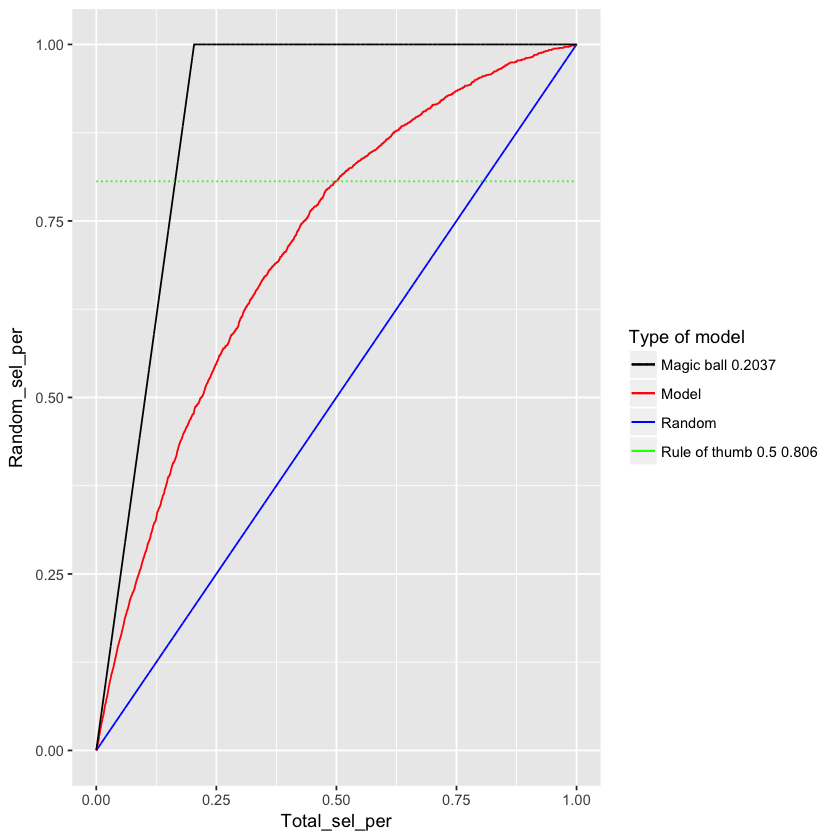

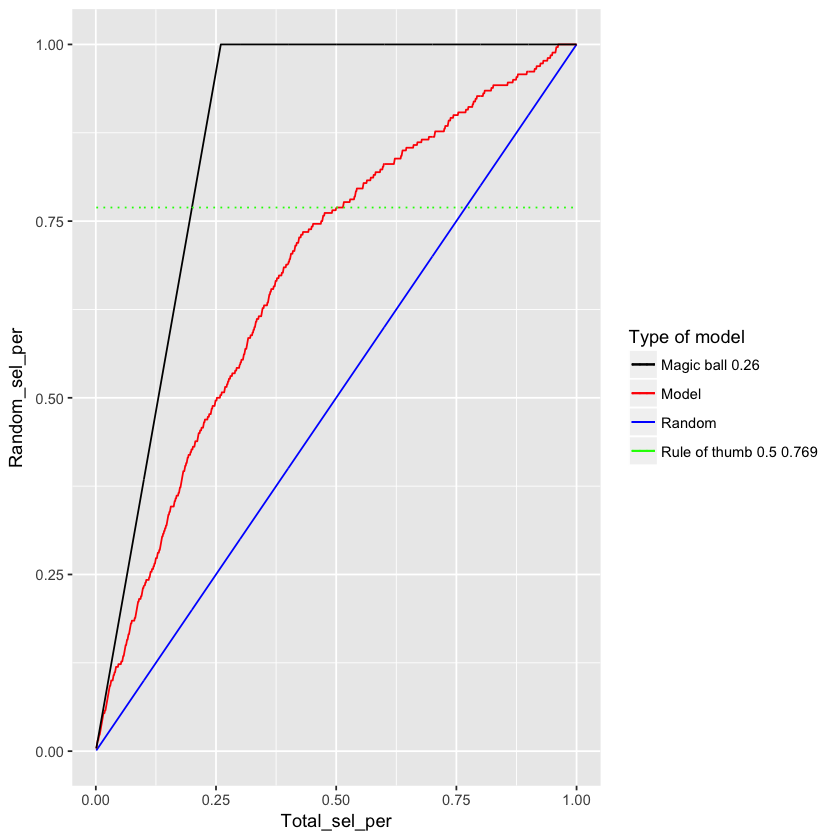

In [26]:
## Same as Lifts curves in Dataiku DSS.
df_test <- dkuReadDataset("Churn_Modelling_Test_Data", samplingMethod="head", nbRows=100000)
df_test["Female"] <- as.numeric(df_test["Gender"] == "Female")
df_test["Germany"] <- as.numeric(df_test["Geography"] == "Germany")
df_test["model_test"] <- predict.glm(model,df_test, type="response" )
create_CAP(df,"Exited", "fit_values")
create_CAP(df_test,"Exited","model_test")

This result is nice since, supposing that you contact 50% of the people you will reach in average to 50% of people that want to buy that product, but with the model you will contact about 80% of the people that want to buy the product. Principaly this will benefit on budget constraints and efficiency. Be cautious with the steps if there are a lot you could use it to understand where to do the cuts to be efficient. (right before king where it flattens). 

** Be catious with models that have 90+% at 50%, this could be heavely overfitted.**

## Plan of attack!!
Cannot interpret coefficients as direct with logistic regression, but you can infer things about the odds. (10:1 10 lose 1 win, only win 1 out of eleven, prob = 1/(10+1), win to lose odds are P(win)/P(lose), as probability of win increase the odds win to lose go to infinity (get better) since P(lose)=1-P(w)) Logit is ln(odds)=ln(p/(1.p)), then by the property of exponents we can separate the linear sum into a multiplication of exponentials. increasing xi by one unit, then the odds will increase by a factor of e^bi.
In the example if we add one day to age, then the odds of that person exiting the bank are increased by a factor of e^(0.072)=1.075. 
To add insights with this information it will be needed to exponenciate the coeficients and then show them from greater to least which will help you tell how the variables affect you model, a good rule of thumb is that everything from 0.8 to 1.2 does not have great impact on your model. Exponential always >0 if coef is <0, then exp is < 1.

## Model deterioration and Maintenance
CAP curve, check with rule of thumb 50% line over time. In some time the model does not get good values and it can even happen that a model has a negative (-50%) result of the model and it means it has to be changed or updated with new variables. 

Reasons this could happen:
1. aditional factors (variables).
2. change of behaviour of the client.
3. Changes in process of how the product is done.
4. Chenges in existing factors. with time clients get older and might not enter a lot of new ones.
5. Competitor
6. industries changes
7. Changes in regulations
8. Changes of product.
9. Depletion, when the product can only be sold once and the client already bought it.
10. Spontaneous changes.

One example is that an specific group might end up together so it can happen that in this concentrations something happened that makes your model change drastically in certain points. Not always is good to be asessed by rule of thumb. Be cautious when models get steps in the midle of the CAP graph.

## Model Maintenance
Asess (check is still performing well) Retrain (if not performing well give fresh data) Rebuild (if not working, create a complete whole new model, if this done well then you will get to a Champion - Callenger point where you will check if the challenger can beat the Champion model) [ARR]. At least do this every 6 months!

## Data preparation
Data is not nice and you have to be cautious on how to prepare your data to be able to use it on your model.
Learning the tools is not as important. what is important is learning the concepts.

ETL -> Database -(70%)> Analize -> Visualize (30%)

### Database
Data warehousing, where your data is stored.
Databases better than Excel:
integrity, columns are defined on what to store.
Combining tables is easy.
Easy scalable
LEVEL UP FROM SCALE

### Extract Transform and Load ETL
Most companies will have their information stored in several types of data (social media, csv, web, excel, json, db, etc) the problem with this is that in most cases data scientist have to reinvent the wheel and always start from cero when confronting this issues.
Microsoft visual studio shell
SQL server data tools BI
Analysis, Integration and Reporting (Analysis, ETL, Visualize)

Data wrangling == Data preparation (Most situations is in csv). Structure well your folders!

It has to be well structured, this has to be smart done, one way can be date - name with date = yy-mm-dd so it will be ordered by date when searching info. then in the project do insides of the results, an inside the data will be in date format.
fix dates so it is consistent, and do the same on the balance. so the table is consistent. (edit pad or notepad++)

Be cautious with ETL, if it is wrong everything is wrong!
Flow like Dataiku DSS, but DSS's is beter. 
Be cautios that the schema is equal to the one you want. Also Name tables by DATE! Also do not use same data twice, replicating is a bad habit.

Just ipening the data files that we have got in excel can cause mayor problems, have to be careful about that.

Bullet proof method: pass format from csv to txt and use the Excel wizard to open selecting all rows as TEXT, then be cautious if the scroll bars appear, if not check where to change this based on operating system. For better sql traspas fix date, $ sign and comas. To change this select "text to column" in data tab and make the changes needed based on the column. long texts (>160char) are not showed in cells if saved as it is, then this data is lost in txt, this information has to be saved as general. Be cautious with the text cualifier, it might mess up how your data is uploaded. if not choosen, then the text is not encapsulated in one column, so if there is a comma in the text it puts it in a new column. Check for skewed rows, be cautious about them.

Tere could be quotes and comas in the same text and this could make excel reformat everything wrong, like column 96 in examplo, in this cases usually you can modify them with a text editor and doing the changes by hand. lost quotations marks from the beginning or end. if in the beginning, then just modify th one at the beginning to how you want it. if in the end be cautious since all info will be put as text. Some analysis do not care to check consistencies so it would check two lines as one and then carry on to the next one. What might be best to do is to get rid of the corrupted data but take it into the record so it is noted as a cualitative error (might help to handle operational risk in the future). Adjustments made to the file were not made to the rows that had anomalies. How to deal with this errors:
1. Handle them by hand.
2. Upload file and deal with errors via SQL.
3. Delete row. (usually this is safer to do since doing the others might mean to deal with lots of errors).

Separate projects in different data bases or at least in different schemas. Other errors that can happen are truncation errors (in this case on 'Feedback').

Send bad records to flat file to be analyzed. (Conditional split, if something happens send it to ->).

### Analyze data
There are two types of analysis. 
1. that really does nor impact you final analysis. Just say in the analysis that some data has been excluded because of the results.
2. when the data that the rows gone are important. Ideal solution: go to the place or person that gave you the data and ask why this is happening. Maybe is happening that they are not aware and it should be fixed. If not answer... then fix by yourself. In most cases it is imposible to fix this problems.

What is important is to understand what is happening in the rows. And make a text explaining what happened with the deleted rows, this is important when making the last report. Showing the areas where to improve is important.

Use SQL to check data errors. Do dueligence checks. Information has to be auditable.

Always check for how many rows are and if it matches what you know you should have since this will make you see that the data is consistent.

Errors on SSIS:
1. Truncation
2. Bad input file format, two columns with same name.
3. Code match mismatch.
4. Out of memory
5. Connection fail
6. Data type mismatch -> if everything as text, then no problem.

Everything is entered as text and leave all the checks to SQL. Raw data helps to avoid errors, if you get a problem in the middle of the analysis, then you will need to check first in the raw data to see if there was the problem or it was done by the analysis.

## SQL
what are the main commands needed in Data science: 
1. Select From 
2. Where -- conditionals -- use of natural language processing (nlp) using percentages and the like operator letters<-% nlp %->letters and wildcards '_' to tell that there must be a letter before (can be as many as you want).
3. /* */ for multiline comments. -- for inline comments
4. Order by -- is to order your data Desc or Asc(default) to select whor it would be ordered
5. Data types: Character Varying(n) [varchar], Int, Float, Date yyyy-mm-dd, Datetime, bit(boolean), money (DO NOT USE)
6. Implicit and explicit conversions: Is how your variables are declared. Data type conversion chart. Explicit conversion is done by Cast, cast(-- as float) and convert, convert(float, --, date) both are usefull.
7. Update to change the data in rows with set-- where--. 
8. Use is for where is null and is not null to check, not the normal == operators.
9. joins, inner only matching rows stay, right join and left join and full join, all data stays.
10. Duplicates on joins, creates new rows based on how many matching rows are.

## Wrangling data after load
3 types of uploaded data RAW (before wrangling after load), wrk (working data) and drv from Raw data -> build Working data (can be the end of the analysis) -> derived table, combined info of the main tables. 

One create the working table by replicating the RAW table we already have. First create an identity table (Not Copy). keep Varchars as they are, and start giving the variables you want as the value you want them to be, even adjusting the data as you want it (if gender is 'M' or 'F', then varchar(1) not 1000). Keep ID numbers as varchar, even if they are numbers. 

After creating the table you use Insert into to tell where to insert the information from where. Basically use RAW table to clean data as text, when ready use the create the table as you want your information to be and then use INSERT INTO to send the data. 

Truncate table when copying new information to avoid duplicates. DROP table be cautious!! Elements procedure. drop->create->truncate->insert. 

Add leading zeros by using ' put seven zeros and use right('0000000'+value,7). 

Is good to have checks on your scripts like count or select * to check your data is right. Date form has to be specified to do a date conversion to a type of date SQL likes. Create backups from your codes! SQL are not as well as you want to be in R or Python, then you can use SQL to make your job easier. Like joins or something like that makes your analysis table to be as easy to manipulate as posible. Select * into (table) can create new tables when manipulating data. Comment with drop table, comment so you do not drop a table by accident.

### Excersise
Check for errors, how many anomalies (rows) are there and be cautious to check using is numeric to see where the error is. Also string and variable data, check if the data that you have is as it has to be (zip ==7) might have more and create truncation. Be careful on manually fixing errors since the resposability ends being yours. Quality assurance rows beggining = rows final - error rows. Check for results where data is not usefull (eg. where balance is less than zero). Usually anomalies happen in small porcentage compared to whole data (one in a hundred thousands). Delete to delete rows that you do not need. Finally you are free to choose which columns you have and how to use your data!


## Comunication
### Cross-Departamental work
working between several divisions, you need to have access to all levels of organization and different departments. (marketing, IT department, operations and more) Needed to do customer investigation via software and get better process, so data science becomes bridge between departments. Walk around the organization, know the details of your organization.
### Come with business problem
Not only bring data and want insights, insights are not brought out of nothing. The way to approach is having a problem and say what kind of data you have.
### Setting expectations and project communication
Telling when are the results delivered and make understand data prep, data gathering, data prep, then insights (usually not quick) aim for deathlines. Tell if not meet deathline. Scopecreep, always more requests and more insights! Be cautious about that, might change deathlines. 
### Sit with them
A lot of insights can be derived from the data, but there are things that cannot be derived from the data and the people you are working for have to be very contious about that. The more exposure you have with the people that need the insights the better, this way you understand where it hurts and how you can help. Change from 2 to 3 pages psychologically can change how you see information through.
### The art of saying no
People will ask you to help them and one has to be able to say "No" how do you choose? -> business value has to be the decision setter. how do you say "no"? Never say no, always think and tell them franckly why you choose that problem. If you are able to make them see you are choosing the one that drives more value, they will understand. Position yourself as a consultant or an advisor. TIPS: Do a bit of research on what you are asked so that when you say "no" you can give an advise.
### Sometimes you have to go to the top
Projects often have to be fast, sometimes there is people that are putting roadblocks. (Him) does not hesitate to go to the top nudge. People that is slow to adapt, enemies can be done, but the job is done.
### Building data culture
Time where data is taking into the world, everythong data driven. Show people how data can make their work easier and win them over. Do not make enemies with data, but be friends with data. Show people how much value has data given to the business. Process to the people that took advantage of the work. 
### Communication in presentations

#### Introduction
Be clear on what the purpose of the presentation is about and take them into the jorney or something that makes the audience excited to hear you. Create a story out of the presentation.
- Lots of UMs and buts.
- What is the presentation going to be about. Mayor success.
- Journey, no hard facts, need to make them feel how they can come along.
- Value they would get. Outline and deliver.
- Engage them, make them laugh and make questions. Reward engagement.
- Eye contact.
- Make it an adventure, do not talk very fast.
- Reintake the story and making them part of the story. Put audience in your shoes.

#### Brainstorming
Data science project 
- Where started to finish.
- Minimal text, put pictures through your journey.
- Put text that is not too techincal, write when not thinking too technical.

#### Present to executives
- Executives love dollar ammounts, how much earn or save.
- Rarely there will be someone really technical, explain in detail without entering into technical stuff.
- Cannot prepare for everything, but try.
- Spike in an auxilary table, do not talk about it if it is not the focus in your presentation, this would help to make the Q&A session going. Do not want to create a presentation and everyone be silent.
- Daunting, but executives are people too.

#### Truth is not always pretty
There could be bottlenecks and you must be prepared and prepare your audience. What if this happens? you are minning for facts and facts not necessarily are pretty.
#### Passion
Passion has to be contagious. Do not think what not to say, but let yourself be carried by your passion. Haw are we going to connect? Living the dream, share our passion to the people.
